🎯 LOGISTICS SIMULATION ANALYSIS
Choose analysis method:
1. Load data from CSV files
2. Use existing DataFrames
✅ Package data loaded successfully: 48048 rows, 8 columns
✅ Simulation data loaded successfully: 27448 rows, 8 columns
🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS

DRONE FLIGHT DISTANCE ANALYSIS

🚁 Individual Drone Flight Distance Analysis:
--------------------------------------------------
Drone 0:
  Total flight distance: 709.71
  Average distance per step: 0.71
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 159

Drone 1:
  Total flight distance: 705.75
  Average distance per step: 0.71
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 156

Drone 2:
  Total flight distance: 794.51
  Average distance per step: 0.79
  Maximum single step distance: 5.00
  Total steps: 1000
  Active movement steps: 176

Drone 3:
  Total flight distance: 813.31
  Average distance per step: 0.81
  Maximum sin

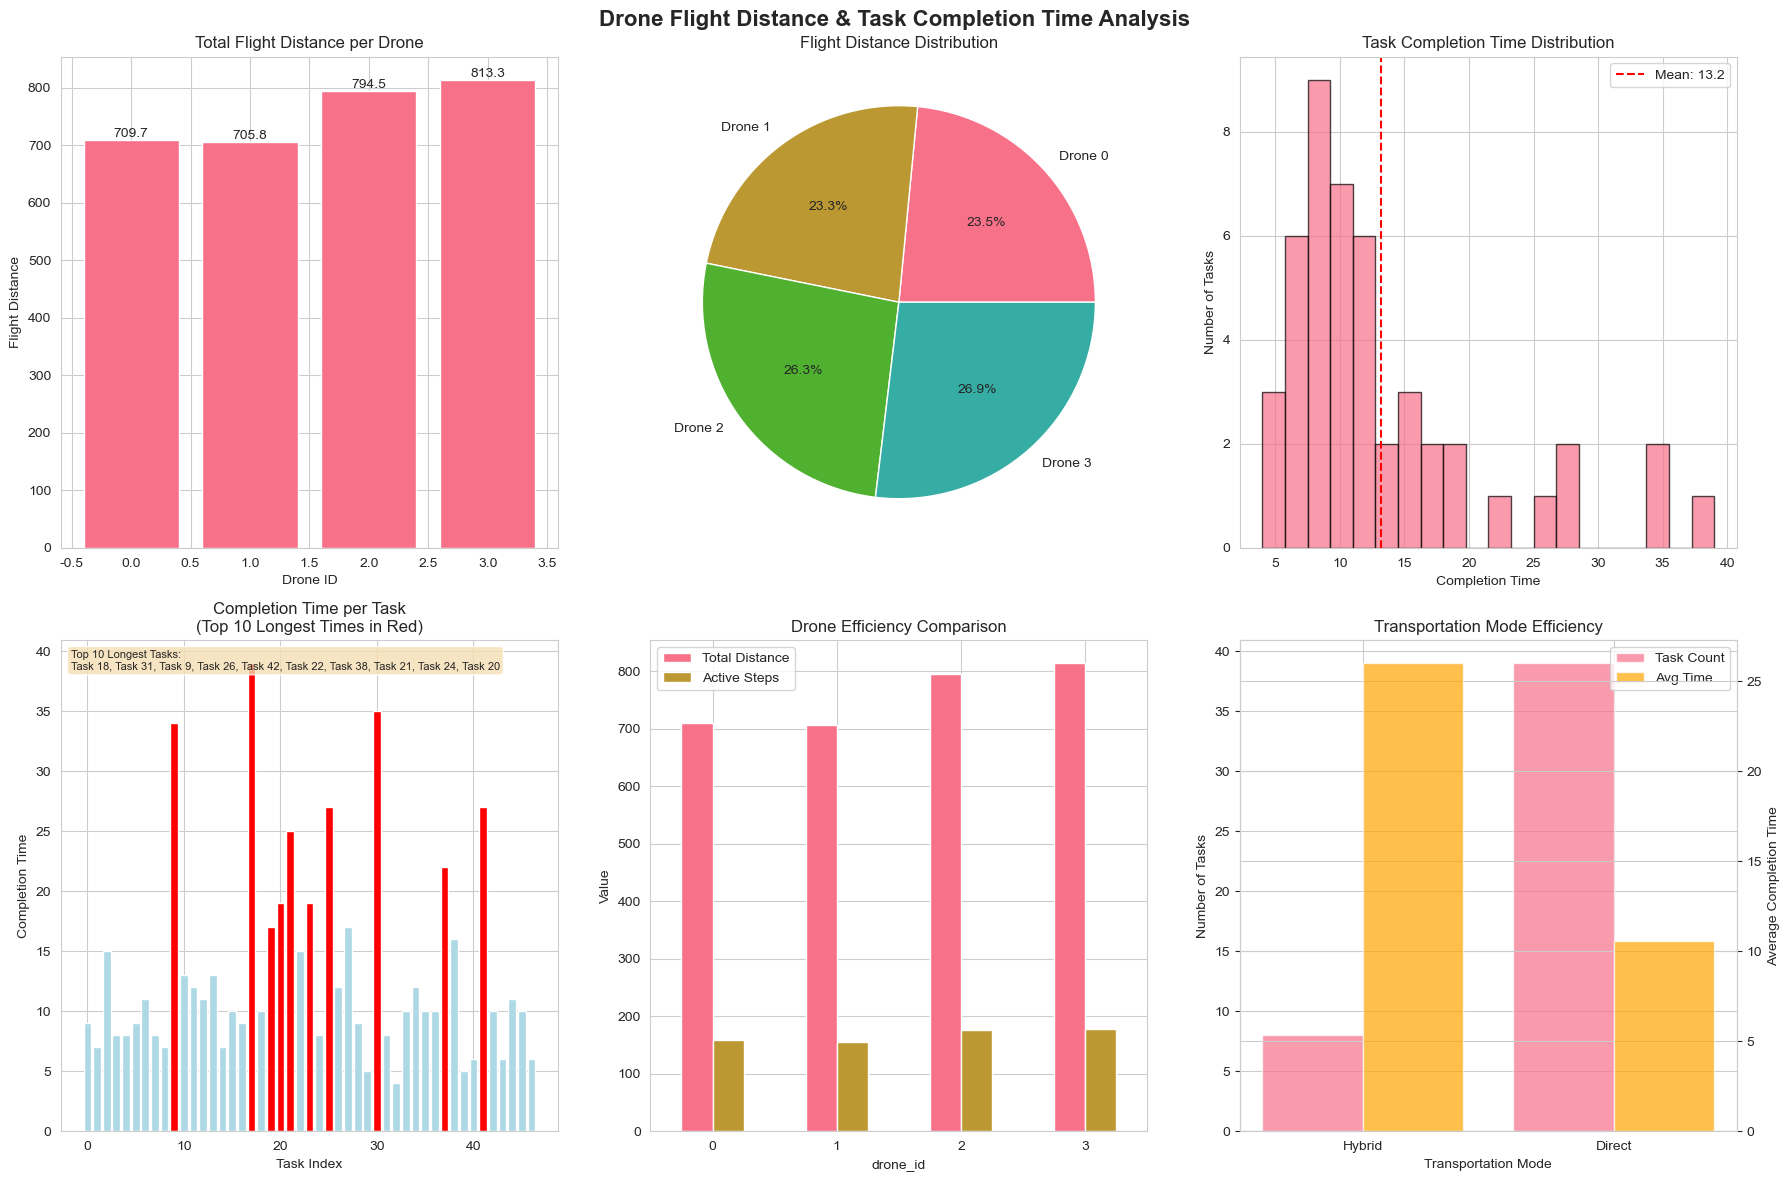


📋 EXECUTIVE SUMMARY REPORT

🚁 DRONE FLEET PERFORMANCE SUMMARY:
  Total drones deployed: 4
  TOTAL FLEET FLIGHT DISTANCE: 3023.28
  Average flight distance per drone: 755.82
  Flight distance standard deviation: 56.08
  Most efficient drone: Drone 3
  Least efficient drone: Drone 1

📦 TASK COMPLETION SUMMARY:
  Total completed tasks: 47
  TOTAL COMPLETION TIME (ALL TASKS): 621
  Average task completion time: 13.21
  Completion time standard deviation: 8.17
  Fastest task completion: 4
  Slowest task completion: 39
  Median completion time: 10.00

📊 SYSTEM EFFICIENCY METRICS:
  Distance/Time efficiency ratio: 57.20
  Fleet utilization rate: 16.70%
  Workload balance score: 92.58%

🚚 TRANSPORTATION MODE PERFORMANCE:
  Direct delivery tasks: 39 (Avg time: 10.59)
  Hybrid delivery tasks: 8 (Avg time: 26.00)

✅ ANALYSIS COMPLETED SUCCESSFULLY!

🎉 Analysis results are ready!
Key metrics calculated:
- Total flight distance: 3023.28
- Total completion time: 621
- Completed tasks: 47


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style and parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

class DroneTaskAnalyzer:
    """
    Specialized analyzer for drone flight distances and task completion times
    Provides detailed metrics for logistics simulation performance evaluation
    """
    
    def __init__(self, package_df=None, simulation_df=None):
        self.package_df = package_df
        self.simulation_df = simulation_df
        
    def load_data(self, package_file='package_simulation_records.csv', 
                  simulation_file='simulation_records.csv'):
        """Load simulation data from CSV files"""
        try:
            self.package_df = pd.read_csv(package_file)
            print(f"✅ Package data loaded successfully: {self.package_df.shape[0]} rows, {self.package_df.shape[1]} columns")
            
            self.simulation_df = pd.read_csv(simulation_file)
            print(f"✅ Simulation data loaded successfully: {self.simulation_df.shape[0]} rows, {self.simulation_df.shape[1]} columns")
            
        except Exception as e:
            print(f"❌ Data loading failed: {e}")
            return False
        return True
    
    def calculate_drone_flight_distances(self):
        """Calculate total flight distance for each drone"""
        print("\n" + "="*60)
        print("DRONE FLIGHT DISTANCE ANALYSIS")
        print("="*60)
        
        if self.simulation_df is None:
            print("❌ No simulation data available")
            return None
        
        # Filter drone data
        drone_data = self.simulation_df[self.simulation_df['entity'] == 'drone'].copy()
        
        if drone_data.empty:
            print("❌ No drone data found")
            return None
        
        drone_distances = []
        total_flight_distance = 0
        
        print(f"\n🚁 Individual Drone Flight Distance Analysis:")
        print("-" * 50)
        
        for drone_id in sorted(drone_data['id'].unique()):
            # Get single drone trajectory data, sorted by time
            single_drone = drone_data[drone_data['id'] == drone_id].sort_values('time')
            
            # Calculate movement distance for each step
            distances = []
            for i in range(1, len(single_drone)):
                prev_x = single_drone.iloc[i-1]['x']
                prev_y = single_drone.iloc[i-1]['y']
                curr_x = single_drone.iloc[i]['x']
                curr_y = single_drone.iloc[i]['y']
                
                # Calculate Euclidean distance
                distance = np.sqrt((curr_x - prev_x)**2 + (curr_y - prev_y)**2)
                distances.append(distance)
            
            # Calculate total distance
            total_distance = sum(distances)
            avg_distance_per_step = np.mean(distances) if distances else 0
            max_distance_step = max(distances) if distances else 0
            
            drone_distances.append({
                'drone_id': drone_id,
                'total_distance': total_distance,
                'avg_distance_per_step': avg_distance_per_step,
                'max_distance_step': max_distance_step,
                'total_steps': len(distances),
                'active_steps': len([d for d in distances if d > 0])  # Steps with actual movement
            })
            
            total_flight_distance += total_distance
            
            print(f"Drone {drone_id}:")
            print(f"  Total flight distance: {total_distance:.2f}")
            print(f"  Average distance per step: {avg_distance_per_step:.2f}")
            print(f"  Maximum single step distance: {max_distance_step:.2f}")
            print(f"  Total steps: {len(distances)}")
            print(f"  Active movement steps: {len([d for d in distances if d > 0])}")
            print()
        
        print("="*50)
        print(f"🌍 TOTAL FLIGHT DISTANCE (ALL DRONES): {total_flight_distance:.2f}")
        print(f"📊 Average flight distance per drone: {total_flight_distance/len(drone_distances):.2f}")
        print("="*50)
        
        return pd.DataFrame(drone_distances), total_flight_distance
    
    def calculate_task_completion_times(self):
        """Calculate completion time for each task"""
        print("\n" + "="*60)
        print("TASK COMPLETION TIME ANALYSIS")
        print("="*60)
        
        if self.package_df is None:
            print("❌ No package data available")
            return None
        
        task_completion_times = []
        total_completion_time = 0
        completed_tasks = 0
        in_progress_tasks = 0
        
        print(f"\n📦 Individual Task Completion Time Analysis:")
        print("-" * 50)
        
        for task_id in sorted(self.package_df['task_id'].unique()):
            # Get all records for a single task, sorted by time
            task_data = self.package_df[self.package_df['task_id'] == task_id].sort_values('time')
            
            # Find actual start time: first time status changes from 'at_pickup_point' to something else
            start_time = None
            pickup_point_records = task_data[task_data['status'] == 'at_pickup_point']
            if not pickup_point_records.empty:
                # Find the first time after 'at_pickup_point' when status changes
                max_pickup_time = pickup_point_records['time'].max()
                next_records = task_data[task_data['time'] > max_pickup_time]
                if not next_records.empty:
                    start_time = next_records['time'].min()
                else:
                    # If never left pickup point, use first pickup point time
                    start_time = pickup_point_records['time'].min()
            else:
                # If no 'at_pickup_point' status found, use minimum time
                start_time = task_data['time'].min()
            
            # Find completion time: first time status becomes 'delivered' or 'directly_delivered'
            completion_records = task_data[task_data['status'].isin(['delivered', 'directly_delivered'])]
            end_time = None
            final_status = task_data['status'].iloc[-1]
            
            if not completion_records.empty:
                end_time = completion_records['time'].min()  # First time it became delivered
                final_status = completion_records['status'].iloc[0]  # Status when first delivered
                is_completed = True
            else:
                is_completed = False
            
            if is_completed and start_time is not None and end_time is not None:
                completion_time = end_time - start_time
                total_completion_time += completion_time
                completed_tasks += 1
                
                # Analyze task trajectory
                status_sequence = []
                prev_status = None
                for _, row in task_data.iterrows():
                    if row['status'] != prev_status:
                        status_sequence.append(row['status'])
                        prev_status = row['status']
                
                task_completion_times.append({
                    'task_id': task_id,
                    'package_id': task_data['package_id'].iloc[0],
                    'start_time': start_time,
                    'end_time': end_time,
                    'completion_time': completion_time,
                    'final_status': final_status,
                    'status_changes': len(status_sequence),
                    'status_sequence': ' → '.join(status_sequence)
                })
                
                print(f"Task {task_id} (Package {task_data['package_id'].iloc[0]}):")
                print(f"  Start time (left pickup point): {start_time}")
                print(f"  Completion time (first delivered): {end_time}")
                print(f"  Total completion time: {completion_time}")
                print(f"  Final status: {final_status}")
                print(f"  Status progression: {' → '.join(status_sequence)}")
                print()
            else:
                in_progress_tasks += 1
                print(f"Task {task_id} (Package {task_data['package_id'].iloc[0]}): In Progress (Current status: {final_status})")
        
        print("="*50)
        print(f"📈 Task Completion Statistics:")
        print(f"  Completed tasks: {completed_tasks}")
        print(f"  In-progress tasks: {in_progress_tasks}")
        print(f"  Total tasks: {completed_tasks + in_progress_tasks}")
        print(f"  Completion rate: {(completed_tasks/(completed_tasks + in_progress_tasks)*100):.2f}%")
        
        if completed_tasks > 0:
            avg_completion_time = total_completion_time / completed_tasks
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): {total_completion_time}")
            print(f"  Average task completion time: {avg_completion_time:.2f}")
        else:
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): 0 (No completed tasks)")
        print("="*50)
        
        return pd.DataFrame(task_completion_times), total_completion_time, completed_tasks
    
    def analyze_drone_efficiency(self, drone_distances_df):
        """Analyze drone efficiency metrics"""
        if drone_distances_df is None:
            return
            
        print("\n" + "="*60)
        print("DRONE EFFICIENCY ANALYSIS")
        print("="*60)
        
        print(f"\n📊 Drone Efficiency Statistics:")
        print(f"  Most active drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmax(), 'drone_id']} "
              f"(Flight distance: {drone_distances_df['total_distance'].max():.2f})")
        print(f"  Least active drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmin(), 'drone_id']} "
              f"(Flight distance: {drone_distances_df['total_distance'].min():.2f})")
        print(f"  Distance standard deviation: {drone_distances_df['total_distance'].std():.2f}")
        print(f"  Workload balance: {(1 - drone_distances_df['total_distance'].std()/drone_distances_df['total_distance'].mean())*100:.2f}%")
        print(f"  Fleet utilization rate: {(drone_distances_df['active_steps'].sum() / drone_distances_df['total_steps'].sum() * 100):.2f}%")
    
    def analyze_task_efficiency(self, task_times_df):
        """Analyze task efficiency metrics"""
        if task_times_df is None or task_times_df.empty:
            return
            
        print("\n" + "="*60)
        print("TASK EFFICIENCY ANALYSIS")
        print("="*60)
        
        print(f"\n⏱️ Task Time Statistics:")
        print(f"  Fastest completed task: Task {task_times_df.loc[task_times_df['completion_time'].idxmin(), 'task_id']} "
              f"(Time: {task_times_df['completion_time'].min()})")
        print(f"  Slowest completed task: Task {task_times_df.loc[task_times_df['completion_time'].idxmax(), 'task_id']} "
              f"(Time: {task_times_df['completion_time'].max()})")
        print(f"  Median completion time: {task_times_df['completion_time'].median():.2f}")
        print(f"  Completion time standard deviation: {task_times_df['completion_time'].std():.2f}")
        
        # Analyze by transportation mode
        direct_delivery = task_times_df[task_times_df['final_status'] == 'directly_delivered']
        hybrid_delivery = task_times_df[task_times_df['final_status'] == 'delivered']
        
        if not direct_delivery.empty:
            print(f"\n🚁 Direct Delivery (Drone Direct):")
            print(f"  Number of tasks: {len(direct_delivery)}")
            print(f"  Average completion time: {direct_delivery['completion_time'].mean():.2f}")
            
        if not hybrid_delivery.empty:
            print(f"\n🚌 Hybrid Delivery (Drone + Bus):")
            print(f"  Number of tasks: {len(hybrid_delivery)}")
            print(f"  Average completion time: {hybrid_delivery['completion_time'].mean():.2f}")
    
    def create_visualizations(self, drone_distances_df, task_times_df, total_flight_distance, total_completion_time):
        """Create comprehensive visualization dashboard"""
        print("\n" + "="*60)
        print("GENERATING VISUALIZATION DASHBOARD")
        print("="*60)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Drone Flight Distance & Task Completion Time Analysis', fontsize=16, fontweight='bold')
        
        # 1. Individual drone flight distance bar chart
        if drone_distances_df is not None:
            ax1 = axes[0, 0]
            bars = ax1.bar(drone_distances_df['drone_id'], drone_distances_df['total_distance'])
            ax1.set_title('Total Flight Distance per Drone')
            ax1.set_xlabel('Drone ID')
            ax1.set_ylabel('Flight Distance')
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom')
        
        # 2. Drone flight distance distribution pie chart
        if drone_distances_df is not None:
            ax2 = axes[0, 1]
            ax2.pie(drone_distances_df['total_distance'], 
                   labels=[f'Drone {i}' for i in drone_distances_df['drone_id']], 
                   autopct='%1.1f%%')
            ax2.set_title('Flight Distance Distribution')
        
        # 3. Task completion time distribution
        if task_times_df is not None and not task_times_df.empty:
            ax3 = axes[0, 2]
            ax3.hist(task_times_df['completion_time'], bins=20, alpha=0.7, edgecolor='black')
            ax3.set_title('Task Completion Time Distribution')
            ax3.set_xlabel('Completion Time')
            ax3.set_ylabel('Number of Tasks')
            ax3.axvline(task_times_df['completion_time'].mean(), color='red', 
                       linestyle='--', label=f'Mean: {task_times_df["completion_time"].mean():.1f}')
            ax3.legend()
        
        # 4. Individual task completion times with top 10 highlighted
        if task_times_df is not None and not task_times_df.empty:
            ax4 = axes[1, 0]
            
            # Find top 10 longest completion times
            top_10_indices = task_times_df.nlargest(10, 'completion_time').index
            top_10_task_ids = task_times_df.loc[top_10_indices, 'task_id'].tolist()
            
            # Create colors: red for top 10, blue for others
            colors = ['red' if i in top_10_indices else 'lightblue' for i in range(len(task_times_df))]
            
            bars = ax4.bar(range(len(task_times_df)), task_times_df['completion_time'], color=colors)
            ax4.set_title('Completion Time per Task\n(Top 10 Longest Times in Red)')
            ax4.set_xlabel('Task Index')
            ax4.set_ylabel('Completion Time')
            
            # Add text annotation for top 10 task IDs
            top_10_text = "Top 10 Longest Tasks:\n" + ", ".join([f"Task {tid}" for tid in top_10_task_ids])
            ax4.text(0.02, 0.98, top_10_text, transform=ax4.transAxes, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    fontsize=8)
            
            # Print top 10 to console as well
            print(f"\n🔝 TOP 10 TASKS WITH LONGEST COMPLETION TIMES:")
            print("-" * 50)
            for i, (idx, row) in enumerate(task_times_df.loc[top_10_indices].iterrows(), 1):
                print(f"{i:2d}. Task {row['task_id']:2d}: {row['completion_time']:5.1f} time units")
            print("-" * 50)
        
        # 5. Drone efficiency comparison
        if drone_distances_df is not None:
            ax5 = axes[1, 1]
            efficiency_data = drone_distances_df[['drone_id', 'total_distance', 'active_steps']].set_index('drone_id')
            efficiency_data.plot(kind='bar', ax=ax5)
            ax5.set_title('Drone Efficiency Comparison')
            ax5.set_ylabel('Value')
            ax5.legend(['Total Distance', 'Active Steps'])
            ax5.tick_params(axis='x', rotation=0)
        
        # 6. Transportation mode comparison
        if task_times_df is not None and not task_times_df.empty:
            ax6 = axes[1, 2]
            transport_stats = task_times_df.groupby('final_status')['completion_time'].agg(['count', 'mean'])
            
            # Dual axis chart: count and average time
            ax6_twin = ax6.twinx()
            
            x_pos = range(len(transport_stats))
            bars1 = ax6.bar([x - 0.2 for x in x_pos], transport_stats['count'], 
                           width=0.4, label='Task Count', alpha=0.7)
            bars2 = ax6_twin.bar([x + 0.2 for x in x_pos], transport_stats['mean'], 
                                width=0.4, label='Avg Time', alpha=0.7, color='orange')
            
            ax6.set_xlabel('Transportation Mode')
            ax6.set_ylabel('Number of Tasks')
            ax6_twin.set_ylabel('Average Completion Time')
            ax6.set_xticks(x_pos)
            ax6.set_xticklabels(['Direct' if x == 'directly_delivered' else 'Hybrid' 
                                for x in transport_stats.index])
            ax6.set_title('Transportation Mode Efficiency')
            
            # Add legend
            lines1, labels1 = ax6.get_legend_handles_labels()
            lines2, labels2 = ax6_twin.get_legend_handles_labels()
            ax6.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
        plt.tight_layout()
        plt.show()
    
    def generate_summary_report(self, drone_distances_df, task_times_df, 
                               total_flight_distance, total_completion_time, completed_tasks):
        """Generate comprehensive summary report"""
        print("\n" + "="*60)
        print("📋 EXECUTIVE SUMMARY REPORT")
        print("="*60)
        
        print(f"\n🚁 DRONE FLEET PERFORMANCE SUMMARY:")
        if drone_distances_df is not None:
            print(f"  Total drones deployed: {len(drone_distances_df)}")
            print(f"  TOTAL FLEET FLIGHT DISTANCE: {total_flight_distance:.2f}")
            print(f"  Average flight distance per drone: {drone_distances_df['total_distance'].mean():.2f}")
            print(f"  Flight distance standard deviation: {drone_distances_df['total_distance'].std():.2f}")
            print(f"  Most efficient drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmax(), 'drone_id']}")
            print(f"  Least efficient drone: Drone {drone_distances_df.loc[drone_distances_df['total_distance'].idxmin(), 'drone_id']}")
        
        print(f"\n📦 TASK COMPLETION SUMMARY:")
        if task_times_df is not None and not task_times_df.empty:
            print(f"  Total completed tasks: {completed_tasks}")
            print(f"  TOTAL COMPLETION TIME (ALL TASKS): {total_completion_time}")
            print(f"  Average task completion time: {task_times_df['completion_time'].mean():.2f}")
            print(f"  Completion time standard deviation: {task_times_df['completion_time'].std():.2f}")
            print(f"  Fastest task completion: {task_times_df['completion_time'].min()}")
            print(f"  Slowest task completion: {task_times_df['completion_time'].max()}")
            print(f"  Median completion time: {task_times_df['completion_time'].median():.2f}")
        
        print(f"\n📊 SYSTEM EFFICIENCY METRICS:")
        if drone_distances_df is not None and task_times_df is not None and not task_times_df.empty:
            avg_distance_per_drone = drone_distances_df['total_distance'].mean()
            avg_time_per_task = task_times_df['completion_time'].mean()
            efficiency_ratio = avg_distance_per_drone / avg_time_per_task if avg_time_per_task > 0 else 0
            utilization_rate = (drone_distances_df['active_steps'].sum() / drone_distances_df['total_steps'].sum() * 100)
            workload_balance = (1 - drone_distances_df['total_distance'].std()/drone_distances_df['total_distance'].mean())*100
            
            print(f"  Distance/Time efficiency ratio: {efficiency_ratio:.2f}")
            print(f"  Fleet utilization rate: {utilization_rate:.2f}%")
            print(f"  Workload balance score: {workload_balance:.2f}%")
            
            # Transportation mode analysis
            if 'final_status' in task_times_df.columns:
                direct_tasks = task_times_df[task_times_df['final_status'] == 'directly_delivered']
                hybrid_tasks = task_times_df[task_times_df['final_status'] == 'delivered']
                
                print(f"\n🚚 TRANSPORTATION MODE PERFORMANCE:")
                if not direct_tasks.empty:
                    print(f"  Direct delivery tasks: {len(direct_tasks)} (Avg time: {direct_tasks['completion_time'].mean():.2f})")
                if not hybrid_tasks.empty:
                    print(f"  Hybrid delivery tasks: {len(hybrid_tasks)} (Avg time: {hybrid_tasks['completion_time'].mean():.2f})")
    
    def run_complete_analysis(self):
        """Execute comprehensive analysis workflow"""
        print("🚀 STARTING DRONE FLIGHT DISTANCE AND TASK COMPLETION TIME ANALYSIS")
        print("="*60)
        
        # 1. Calculate drone flight distances
        drone_distances_df, total_flight_distance = self.calculate_drone_flight_distances()
        
        # 2. Calculate task completion times
        task_times_df, total_completion_time, completed_tasks = self.calculate_task_completion_times()
        
        # 3. Efficiency analysis
        self.analyze_drone_efficiency(drone_distances_df)
        self.analyze_task_efficiency(task_times_df)
        
        # 4. Generate visualizations
        self.create_visualizations(drone_distances_df, task_times_df, 
                                 total_flight_distance, total_completion_time)
        
        # 5. Generate summary report
        self.generate_summary_report(drone_distances_df, task_times_df, 
                                   total_flight_distance, total_completion_time, completed_tasks)
        
        print(f"\n✅ ANALYSIS COMPLETED SUCCESSFULLY!")
        
        return {
            'drone_distances': drone_distances_df,
            'task_completion_times': task_times_df,
            'total_flight_distance': total_flight_distance,
            'total_completion_time': total_completion_time,
            'completed_tasks': completed_tasks
        }

# Usage Functions
def analyze_drone_task_data(package_df=None, simulation_df=None):
    """Analyze data from existing DataFrames"""
    analyzer = DroneTaskAnalyzer(package_df, simulation_df)
    return analyzer.run_complete_analysis()

def analyze_from_files(package_file='package_simulation_records.csv', 
                      simulation_file='simulation_records.csv'):
    """Load and analyze data from CSV files"""
    analyzer = DroneTaskAnalyzer()
    if analyzer.load_data(package_file, simulation_file):
        return analyzer.run_complete_analysis()
    else:
        return None

# Main execution function
if __name__ == "__main__":
    # Option 1: Analyze from CSV files
    print("🎯 LOGISTICS SIMULATION ANALYSIS")
    print("Choose analysis method:")
    print("1. Load data from CSV files")
    print("2. Use existing DataFrames")
    
    # Method 1: File-based analysis
    results = analyze_from_files()
    
    # Method 2: DataFrame-based analysis (if you already have the data)
    # results = analyze_drone_task_data(package_simulation_df, simulation_df)
    
    if results:
        print("\n🎉 Analysis results are ready!")
        print("Key metrics calculated:")
        print(f"- Total flight distance: {results['total_flight_distance']:.2f}")
        print(f"- Total completion time: {results['total_completion_time']}")
        print(f"- Completed tasks: {results['completed_tasks']}")